In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [3]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [6]:
df.describe().dtypes

PassengerId    float64
Survived       float64
Pclass         float64
Age            float64
SibSp          float64
Parch          float64
Fare           float64
dtype: object

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Replacing null and missing values

In [8]:
#Age- Getting median age
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\Akshat\AppData\Local\Temp\ipykernel_11536\2094450737.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [9]:
#Cabin- make separate column
df['Has-Cabin'] = df['Cabin'].notna().astype('int')
df.drop('Cabin', axis=1, inplace=True)

In [10]:
#Embarked- Common value as only 2 missing values
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\Akshat\AppData\Local\Temp\ipykernel_11536\1989593508.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [11]:
# dataframe after replacing null values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has-Cabin      0
dtype: int64

## Univariate Analysis
#### Each variable analysed independently- Categorical and Numerical

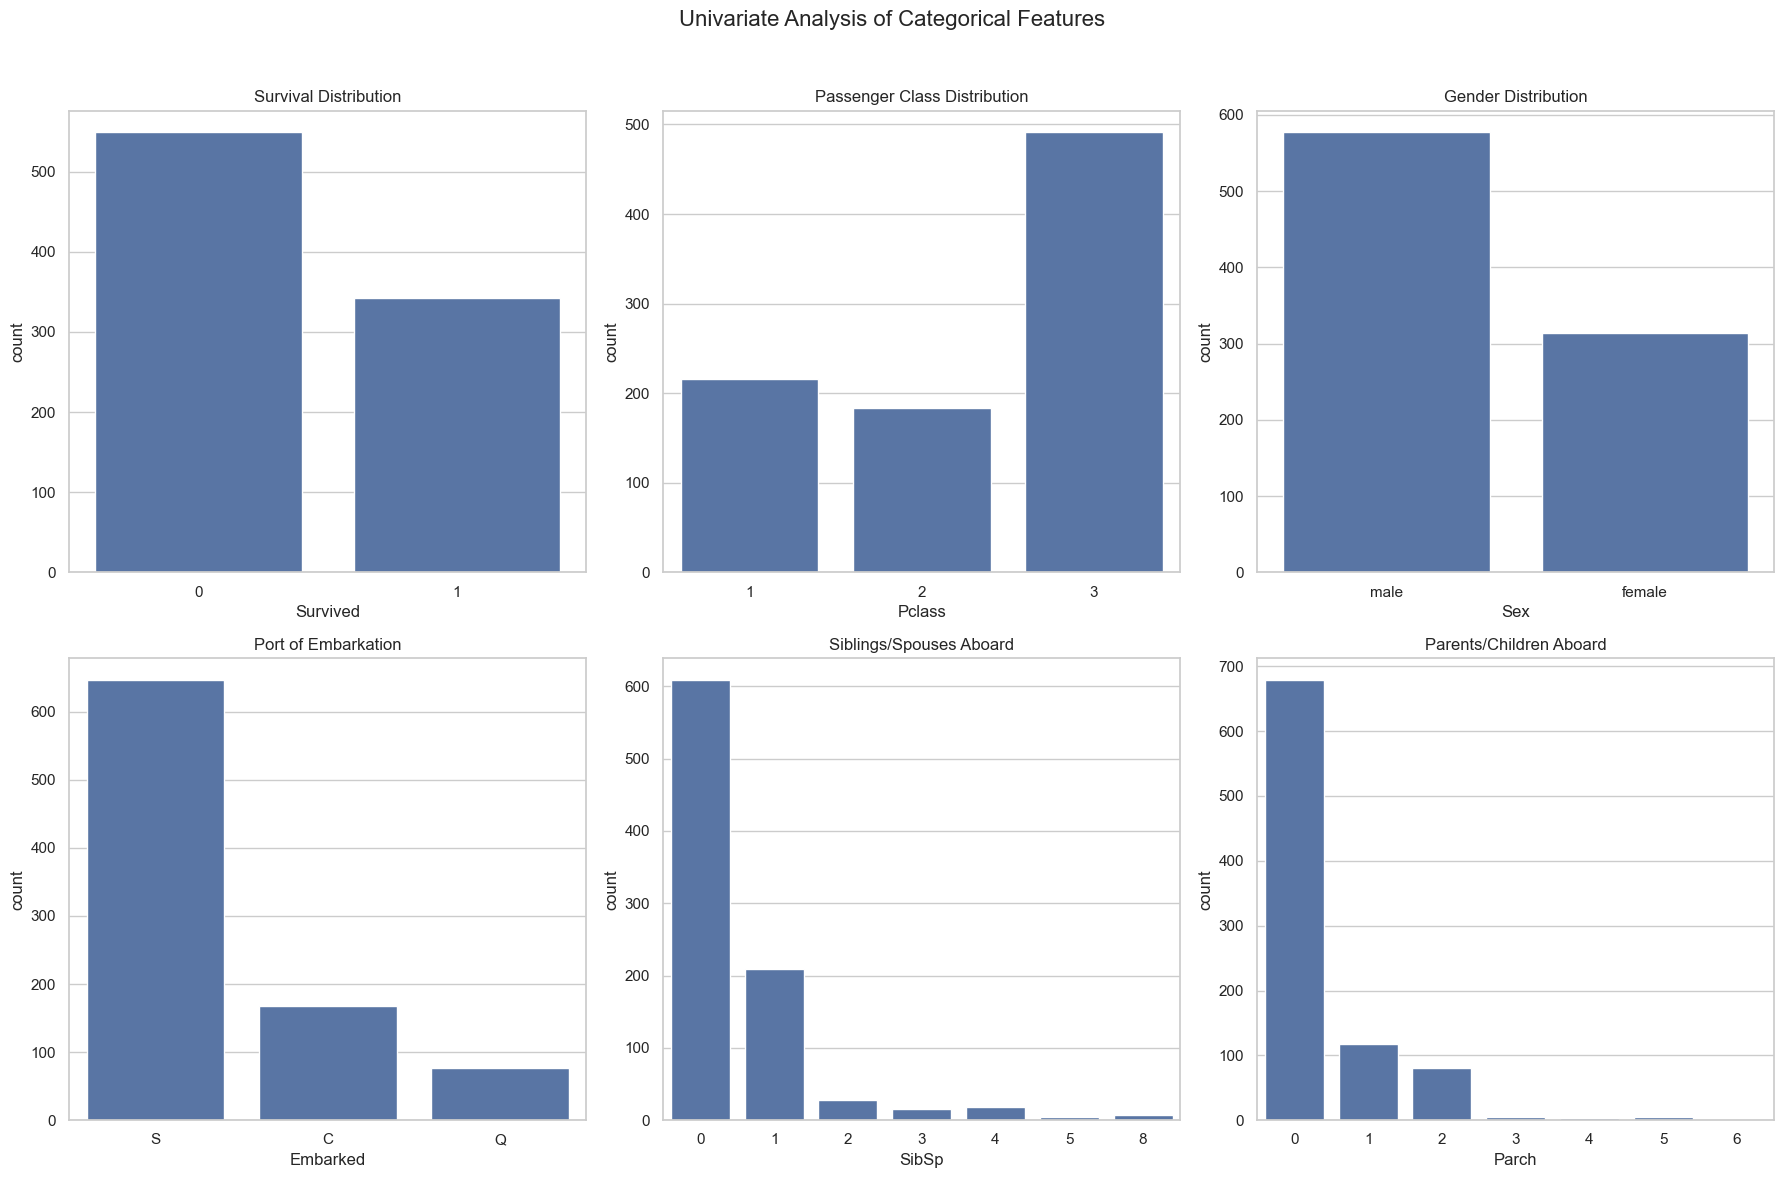

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Univariate Analysis of Categorical Features', fontsize=16)


sns.countplot(ax=axes[0, 0], x='Survived', data=df).set_title('Survival Distribution')
sns.countplot(ax=axes[0, 1], x='Pclass', data=df).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0, 2], x='Sex', data=df).set_title('Gender Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=df).set_title('Port of Embarkation')
sns.countplot(ax=axes[1, 1], x='SibSp', data=df).set_title('Siblings/Spouses Aboard')
sns.countplot(ax=axes[1, 2], x='Parch', data=df).set_title('Parents/Children Aboard')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Numerical Feature Summary:


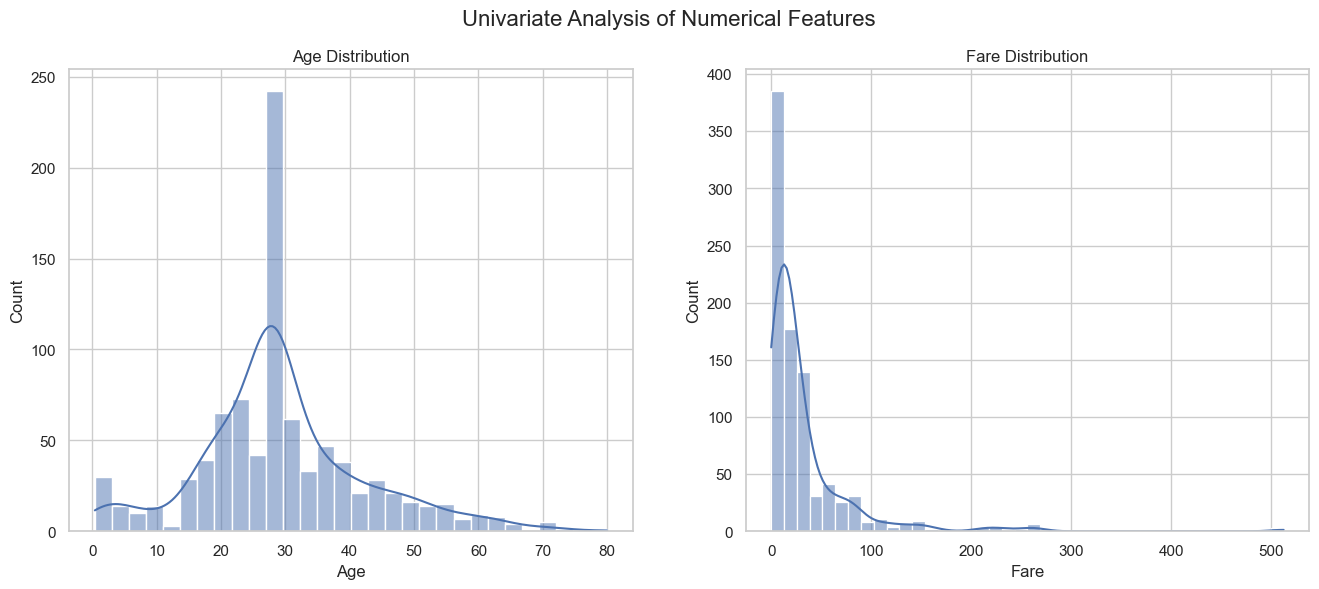

In [25]:
print("\nNumerical Feature Summary:")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize=16)

sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=30).set_title('Age Distribution')
sns.histplot(ax=axes[1], data=df, x='Fare', kde=True, bins=40).set_title('Fare Distribution')

plt.show()

### Bivariate Analysis

In [26]:
### Bivariate Analysis is analysis relationships between two variables/features

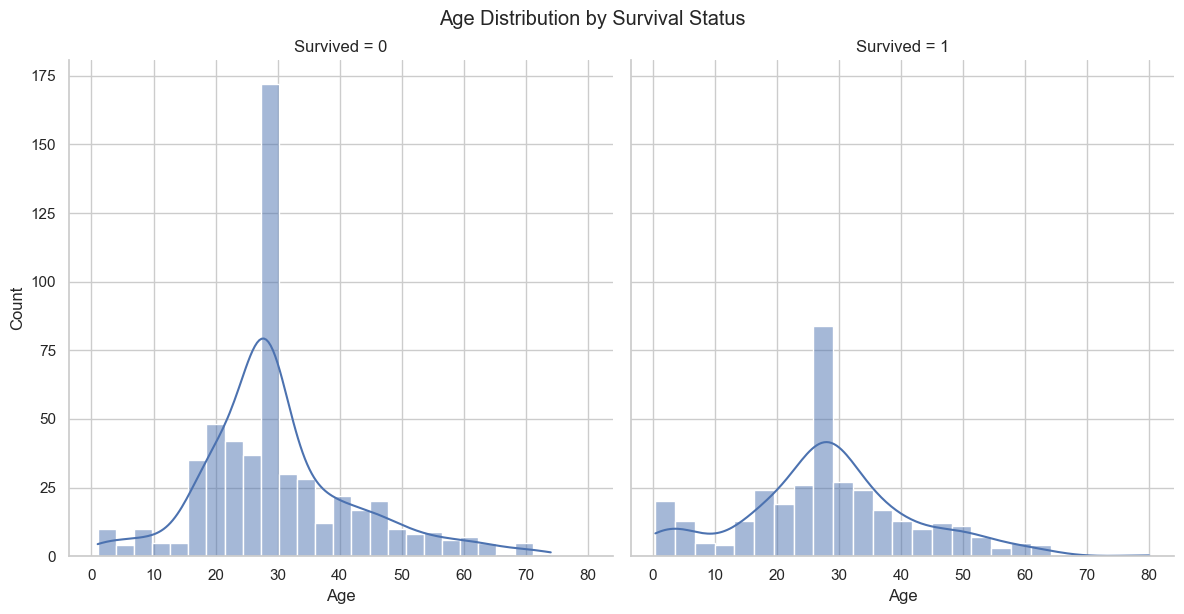

In [13]:
##Survival vs Age
g = sns.FacetGrid(df, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

Text(0.5, 1.0, 'Survival Rate by Cabin Availability')

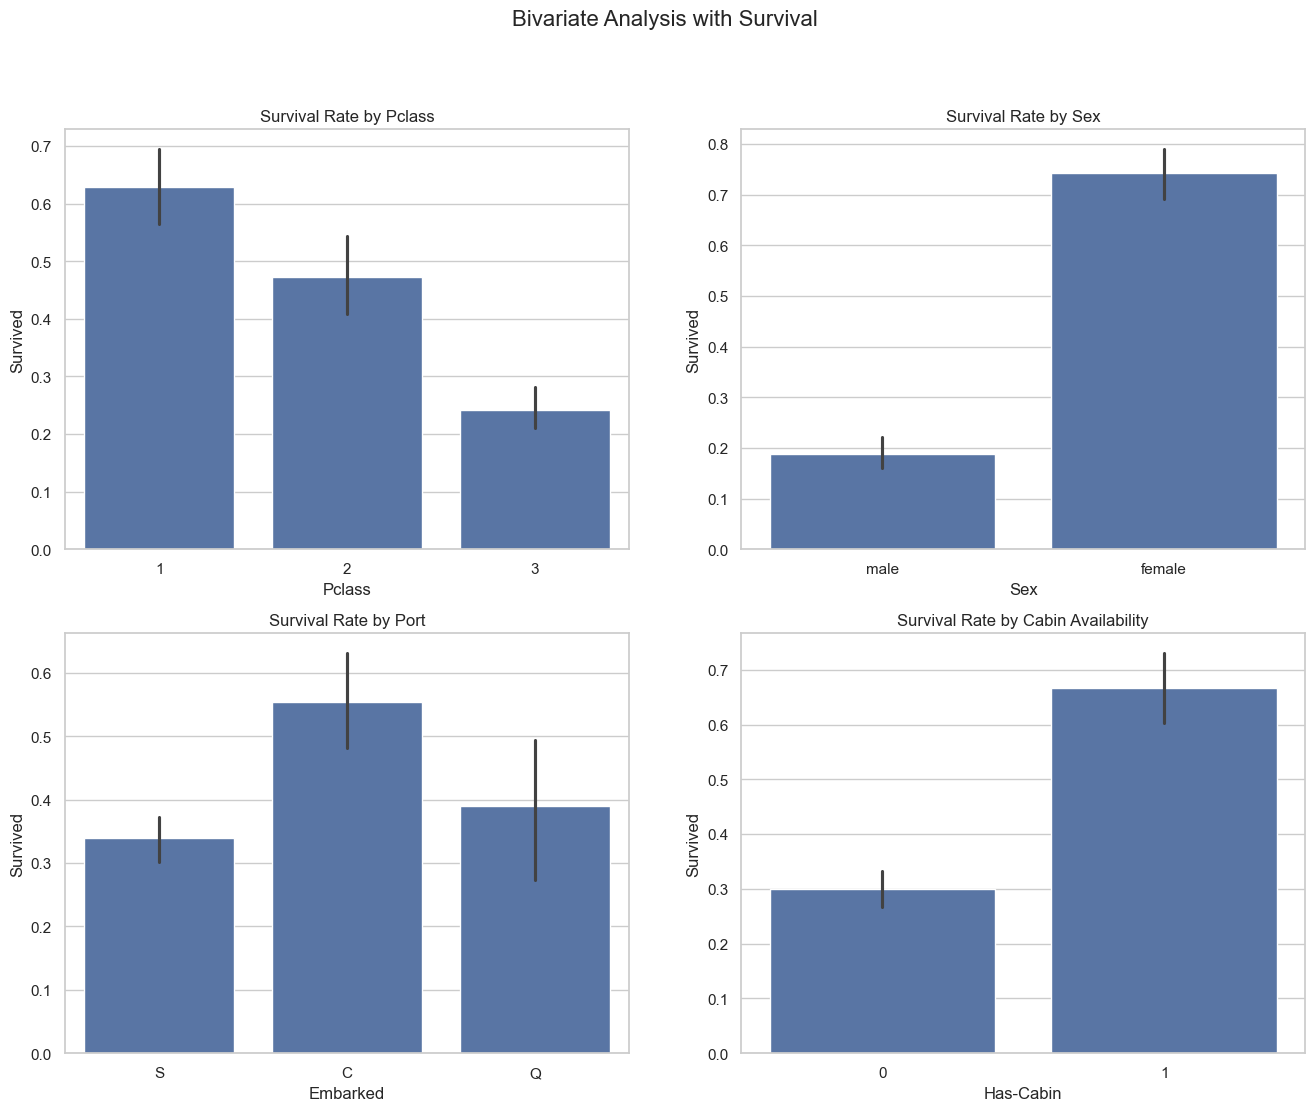

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Bivariate Analysis with Survival', fontsize=16)

sns.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=df).set_title('Survival Rate by Sex')

sns.barplot(ax=axes[1, 0], x='Embarked', y='Survived', data=df).set_title('Survival Rate by Port')

sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=df).set_title('Survival Rate by Pclass')

sns.barplot(ax=axes[1, 1], x='Has-Cabin', y='Survived', data=df).set_title('Survival Rate by Cabin Availability')

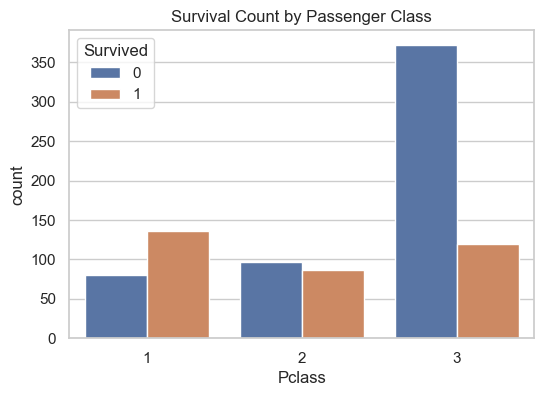

In [14]:
## Survival vs Class
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Pclass", hue="Survived")
plt.title("Survival Count by Passenger Class")
plt.show()

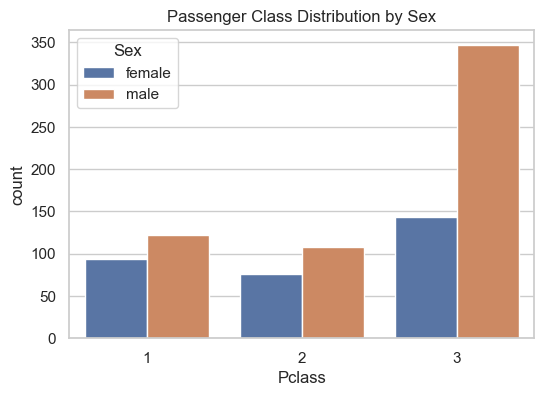

In [15]:
## Categorical vs Categorical

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Pclass", hue="Sex")
plt.title("Passenger Class Distribution by Sex")
plt.show()

### Feature Extraction and Generation

In [16]:
# Creating feature family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 2. Create an 'IsAlone' feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1


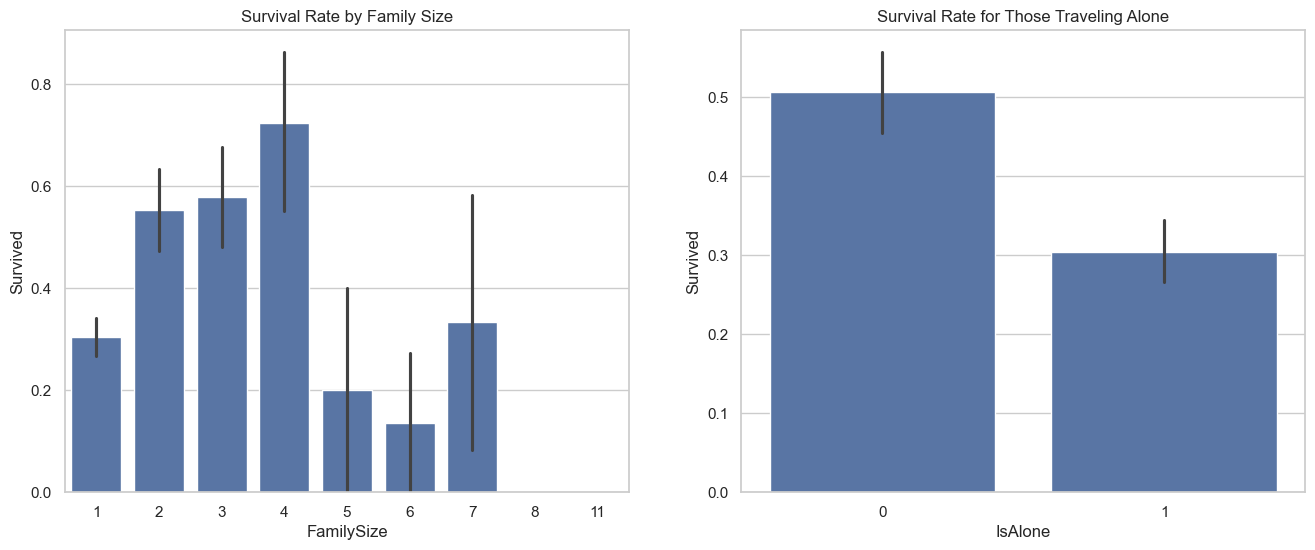

In [17]:
## Analysis of new features vs Survival
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=df).set_title('Survival Rate by Family Size')

sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=df).set_title('Survival Rate for Those Traveling Alone')

plt.show()

In [19]:
### Creating title wrt names

df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

print("Extracted Titles:")
df['Title'].value_counts()

Extracted Titles:


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

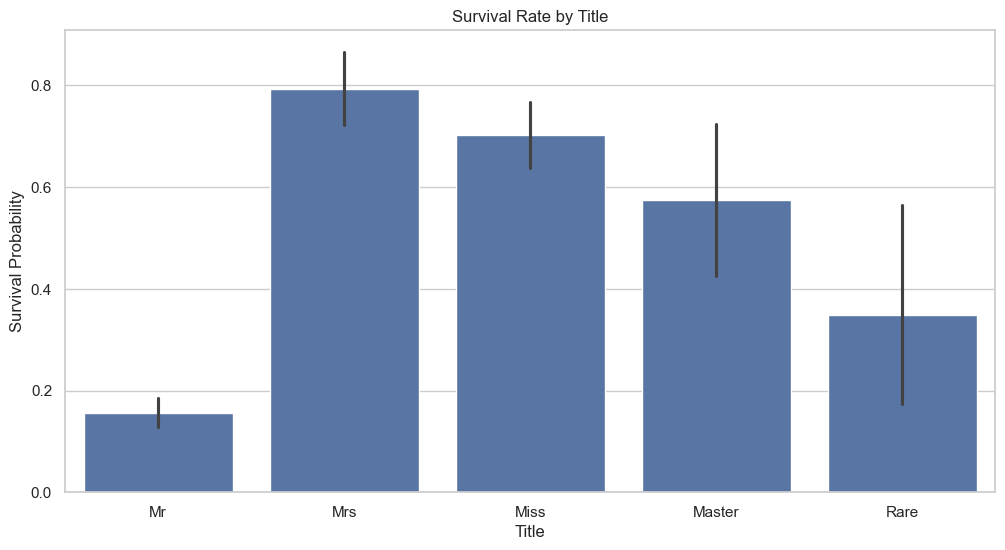

In [20]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Analysis of Title vs Survival
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

### Correlation coefficient

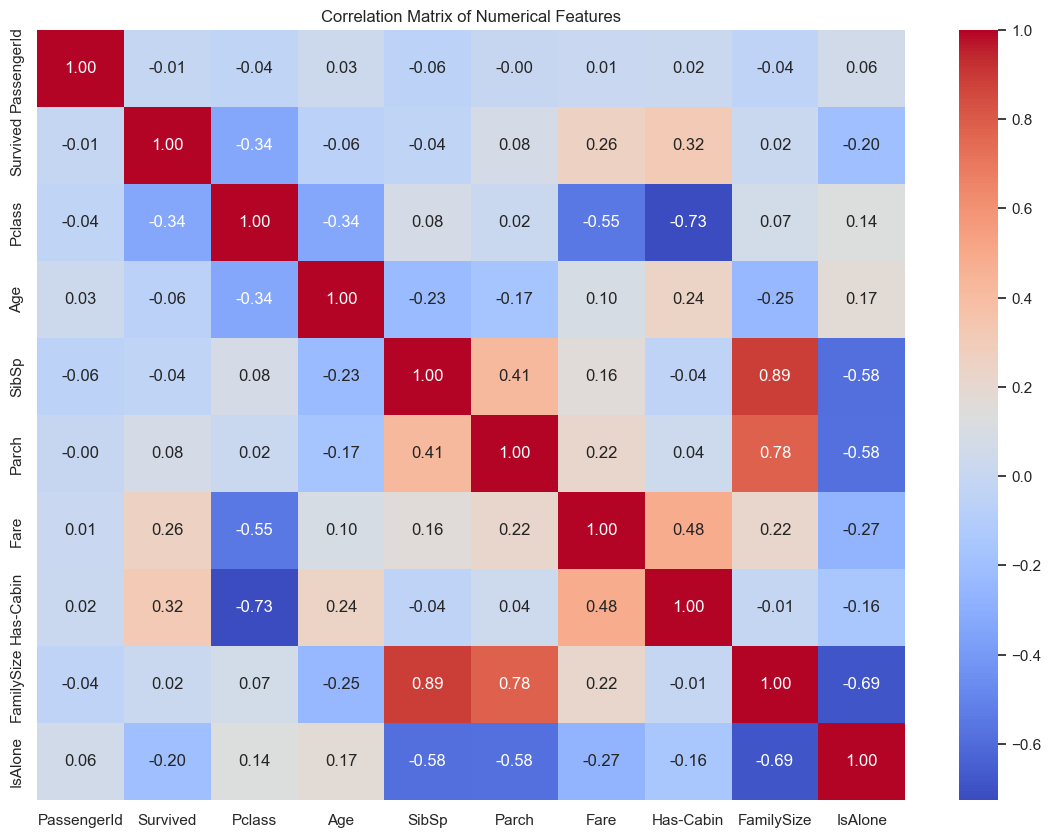

In [21]:
plt.figure(figsize=(14, 10))
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Multivariate Analysis

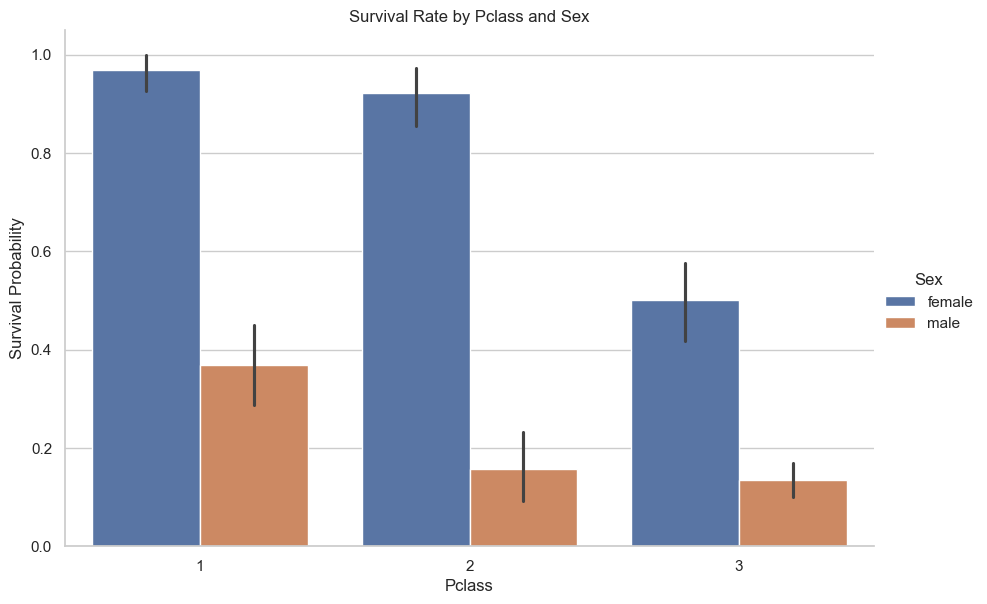

In [22]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()

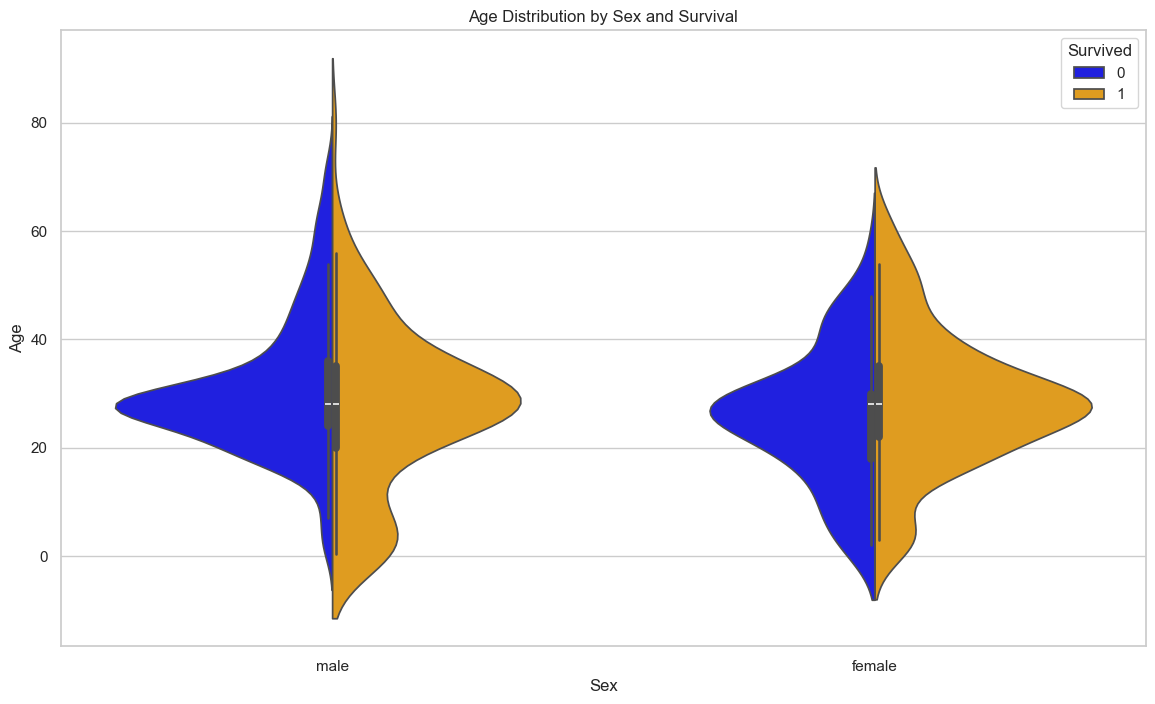

In [24]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, palette={0: 'blue', 1: 'orange'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

In [27]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Titanic Dataset Profiling Report")

# Display the report in the notebook
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:03<00:00,  3.76s/it]


In [26]:
!pip install ipywidgets -q

In [28]:
profile.to_file("Titanic_Profiling_Report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 21.79it/s]
